In [ ]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
raiz = '/content/gdrive/MyDrive/Colab Notebooks/'

In [54]:
input_shape = (28*28,) #imàgenes 28*28
intermediate_dim_0 = 256
intermediate_dim_1 = 128
intermediate_dim_2 = 64
intermediate_dim_3 = 32
intermediate_dim_4 = 16
latent_dim = 2 
    
epochs = 3
batch_size=64


In [56]:
# Encoder

inputs = Input(shape=input_shape,name='encoder_input')
x = Activation('relu')(inputs)
x = Dense(intermediate_dim_0, name='hidden_layer_0_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_1, name='hidden_layer_1_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2, name='hidden_layer_2_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3, name='hidden_layer_3_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_4, name='hidden_layer_4_e')(x)
x = Activation('relu')(x)
outputs = Dense(latent_dim, name='latent_space')(x)


encoder = Model(inputs=inputs, outputs=outputs, name='dense_encoder')

#encoder.summary()

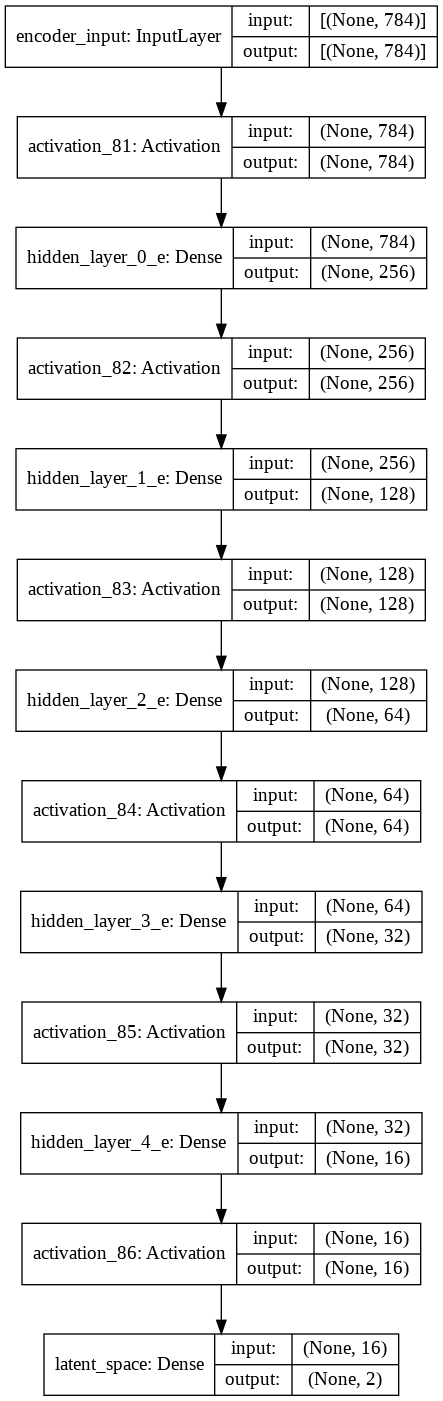

In [57]:
plot_model(encoder, to_file=raiz+'Imagenes/encoder_dense_minist.png', show_shapes=True)

In [58]:
# Decoder

latent_input = Input(shape = (latent_dim,), name='decoder_input')
x = Activation('relu')(latent_input)
x = Dense(intermediate_dim_4 , name='hidden_layer_de_4_d')(latent_input)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3 , name='hidden_layer_de_3_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2 , name='hidden_layer_de_2_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_1 , name='hidden_layer_de_1_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_0, name='hidden_layer_0_e')(x)
x = Activation('relu')(x)
x = Dense(input_shape[0], name='original_space')(x)
x = Activation('sigmoid')(x)

decoder = Model(inputs=latent_input, outputs=x, name='decoder')

#decoder.summary()

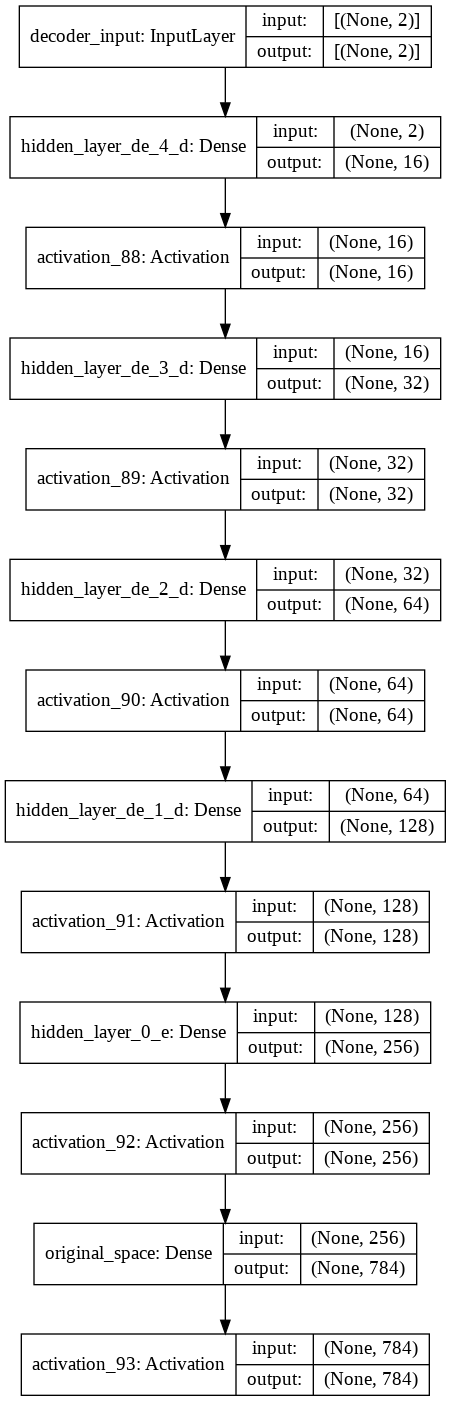

In [59]:
plot_model(decoder, to_file=raiz + 'Imagenes/decoder_dense_minist.png', show_shapes=True)

In [63]:
# Autoencoder

autoencoder = Model(inputs=inputs, outputs=decoder(encoder(inputs)), name='autoencoder_mnist_model')

#autoencoder.summary()

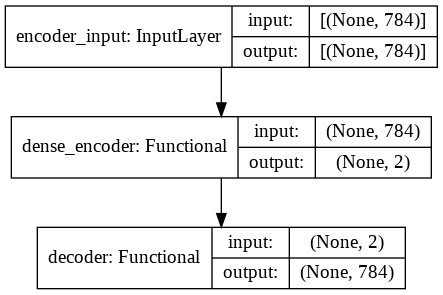

In [62]:
plot_model(autoencoder, to_file=raiz+'Imagenes/autoencoder_dense_mnist.png', show_shapes=True)

In [64]:
optimizer = Adam(learning_rate=1e-3)
loss_fn = MeanSquaredError()
autoencoder.compile(optimizer= optimizer, loss = loss_fn)

In [65]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

epochs = 20
batch_size = 64

In [66]:
# Entrenamiento

history = autoencoder.fit(x_train, x_train, epochs = epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
844/844 [==============================] - 9s 10ms/step - loss: 0.0660 - val_loss: 0.0321
Epoch 2/20
844/844 [==============================] - 8s 9ms/step - loss: 0.0311 - val_loss: 0.0299
Epoch 3/20
844/844 [==============================] - 8s 9ms/step - loss: 0.0293 - val_loss: 0.0290
Epoch 4/20
844/844 [==============================] - 8s 9ms/step - loss: 0.0284 - val_loss: 0.0287
Epoch 5/20
844/844 [==============================] - 8s 10ms/step - loss: 0.0279 - val_loss: 0.0281
Epoch 6/20
844/844 [==============================] - 8s 10ms/step - loss: 0.0273 - val_loss: 0.0269
Epoch 7/20
844/844 [==============================] - 8s 9ms/step - loss: 0.0271 - val_loss: 0.0270
Epoch 8/20
844/844 [==============================] - 8s 9ms/step - loss: 0.0275 - val_loss: 0.0279
Epoch 9/20
844/844 [==============================] - 8s 9ms/step - loss: 0.0277 - val_loss: 0.0271
Epoch 10/20
844/844 [==============================] - 8s 9ms/step - loss: 0.0270 - val_loss: 0.0

In [69]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
#hist.tail()

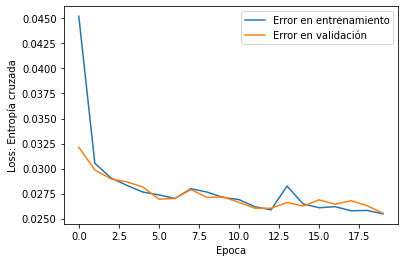

In [70]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropía cruzada')
plt.plot(hist['epoch'], hist['loss'], label='Error en entrenamiento')
plt.plot(hist['epoch'], hist['val_loss'],label='Error en validación')
#plt.ylim([0,0.5])
plt.legend()
plt.show()

In [71]:
# Evaluación en el conjunto test

autoencoder.evaluate(x_test,x_test) 
autoencoder.evaluate(x_train,x_train)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0252


0.025231188163161278